<a href="https://colab.research.google.com/github/sravanreddy6745/Traffic-Sign-Classification/blob/master/traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.getcwd()

'/content'

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [4]:
os.getcwd()

'/gdrive'

In [5]:
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/train.p",mode='rb') as training_data:
  train=pickle.load(training_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/test.p",mode='rb') as test_data:
  test=pickle.load(test_data)
with open("/gdrive/My Drive/Traffic-Sign-Classification/traffic-signs-data/valid.p",mode='rb') as validation_data:
  validation=pickle.load(validation_data)

In [6]:
X_train,y_train=train['features'],train['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

In [9]:
X_valid,y_valid=validation['features'],validation['labels']

In [10]:
X_test,y_test=test['features'],test['labels']

In [11]:
X_valid.shape,y_valid.shape

((4410, 32, 32, 3), (4410,))

In [12]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

Image Visualisation


13

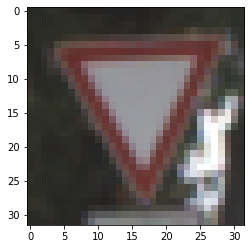

In [13]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

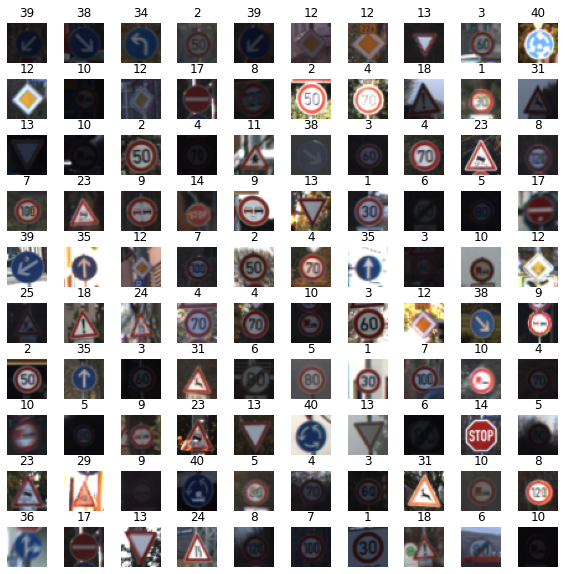

In [14]:
width=10
length=10
fig,axes=plt.subplots(length,width,figsize=(10,10))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,width*length):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)


In [15]:
from sklearn.utils import shuffle

In [16]:
X_train,y_train=shuffle(X_train,y_train)

In [17]:
X_train_gray=np.sum(X_train/3,axis=3,keepdims=True)

In [18]:
X_train_gray.shape

(34799, 32, 32, 1)

In [19]:
X_train_norm=(X_train_gray-128)/128

In [20]:
X_train_norm

array([[[[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[-0.74479167],
         [-0.72395833],
         [-0.7265625 ],
         ...,
         [-0.57552083],
         [-0.52604167],
         [-0.47135417]],

        [[-0.75      ],
         [-0.73958333],
         [-0.73697917],
         ...,
         [-0.5859375 ],
         [-0.54427083],
         [-0.51822917]],

        [[-0.79947917],
         [-0.7734375 ],
         [-0.73697917],
         ...,
         [-0.59635417],
         [-0.5859375 ],
         [-0.60677083]]],


       [[[-0.859375  ],


In [21]:
X_test,y_test=shuffle(X_test,y_test)

In [22]:
X_test_gray=np.sum(X_test/3,axis=3,keepdims=True)
X_test_gray.shape

(12630, 32, 32, 1)

In [23]:
X_test_norm=(X_test_gray-128)/128

In [24]:
X_test_norm

array([[[[-0.73177083],
         [-0.75260417],
         [-0.71614583],
         ...,
         [-0.77604167],
         [-0.70052083],
         [-0.77604167]],

        [[-0.7265625 ],
         [-0.765625  ],
         [-0.7421875 ],
         ...,
         [-0.7578125 ],
         [-0.8359375 ],
         [-0.81770833]],

        [[-0.70052083],
         [-0.7578125 ],
         [-0.67708333],
         ...,
         [-0.5859375 ],
         [-0.6328125 ],
         [-0.76822917]],

        ...,

        [[-0.86979167],
         [-0.87239583],
         [-0.86979167],
         ...,
         [-0.87239583],
         [-0.86979167],
         [-0.87239583]],

        [[-0.86979167],
         [-0.8828125 ],
         [-0.86979167],
         ...,
         [-0.88020833],
         [-0.8671875 ],
         [-0.86458333]],

        [[-0.87239583],
         [-0.875     ],
         [-0.87239583],
         ...,
         [-0.87760417],
         [-0.8671875 ],
         [-0.8671875 ]]],


       [[[-0.859375  ],


In [25]:
X_valid,y_valid=shuffle(X_valid,y_valid)

In [26]:
X_valid_gray=np.sum(X_valid/3,axis=3,keepdims=True)

In [27]:
X_valid_norm=(X_valid_gray-128)/128

In [28]:
X_valid_gray.shape

(4410, 32, 32, 1)

In [29]:
X_valid_norm

array([[[[ 0.46354167],
         [ 0.45572917],
         [ 0.46354167],
         ...,
         [-0.57552083],
         [-0.625     ],
         [-0.6171875 ]],

        [[ 0.45833333],
         [ 0.47916667],
         [ 0.46354167],
         ...,
         [-0.62760417],
         [-0.640625  ],
         [-0.62239583]],

        [[ 0.45052083],
         [ 0.49739583],
         [ 0.46875   ],
         ...,
         [-0.66145833],
         [-0.60416667],
         [-0.55989583]],

        ...,

        [[ 0.01822917],
         [ 0.08854167],
         [-0.00260417],
         ...,
         [-0.42708333],
         [-0.42708333],
         [-0.50260417]],

        [[-0.00260417],
         [ 0.109375  ],
         [ 0.0234375 ],
         ...,
         [-0.5234375 ],
         [-0.48697917],
         [-0.515625  ]],

        [[-0.05729167],
         [-0.01041667],
         [-0.0234375 ],
         ...,
         [-0.59895833],
         [-0.59114583],
         [-0.59635417]]],


       [[[-0.92447917],


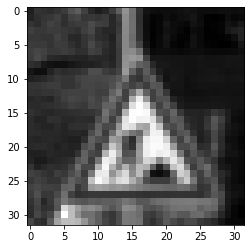

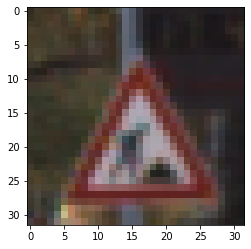

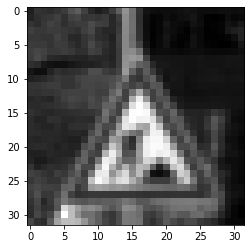

In [30]:
i=np.random.randint(1,len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_norm[i].squeeze(),cmap='gray')
#plt.figure()

In [31]:
from tensorflow.keras import layers,datasets,models
model=models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(32,32,1)))
model.add(layers.Conv2D(32, (5,5), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train_norm, y_train, batch_size=32, epochs=15, validation_data=(X_valid_norm, y_valid))


Epoch 1/15
1088/1088 [==============================] - 5s 4ms/step - loss: 0.8946 - accuracy: 0.7527 - val_loss: 0.1292 - val_accuracy: 0.9592
Epoch 2/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.1602 - accuracy: 0.9533 - val_loss: 0.0969 - val_accuracy: 0.9719
Epoch 3/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.1064 - accuracy: 0.9685 - val_loss: 0.0827 - val_accuracy: 0.9769
Epoch 4/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0831 - accuracy: 0.9758 - val_loss: 0.0949 - val_accuracy: 0.9707
Epoch 5/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0581 - val_accuracy: 0.9850
Epoch 6/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0623 - accuracy: 0.9818 - val_loss: 0.0718 - val_accuracy: 0.9807
Epoch 7/15
1088/1088 [==============================] - 4s 4ms/step - loss: 0.0597 - accuracy: 0.9820 - val_loss: 0.0503 - val_accuracy:

In [34]:
score=model.evaluate(X_test_norm,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.1731 - accuracy: 0.9676


In [ ]:
score

[0.30474478006362915, 0.9533650279045105]

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']

accuracy

[0.7527227997779846,
 0.9532745480537415,
 0.9685335755348206,
 0.9757751822471619,
 0.9769245982170105,
 0.9817810654640198,
 0.9820396900177002,
 0.9832466244697571,
 0.9831604361534119,
 0.9853731393814087,
 0.986034095287323,
 0.9847984313964844,
 0.9872984886169434,
 0.9865800738334656,
 0.989137589931488]

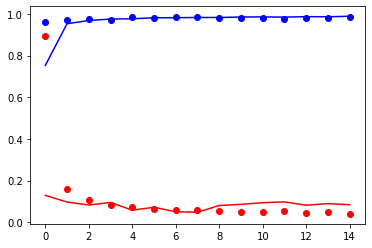

In [37]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="validation Loss")
plt.plot(epochs, val_accuracy,'bo',label="validation accuracy")
plt.plot(epochs,accuracy,'b',label="accuracy")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


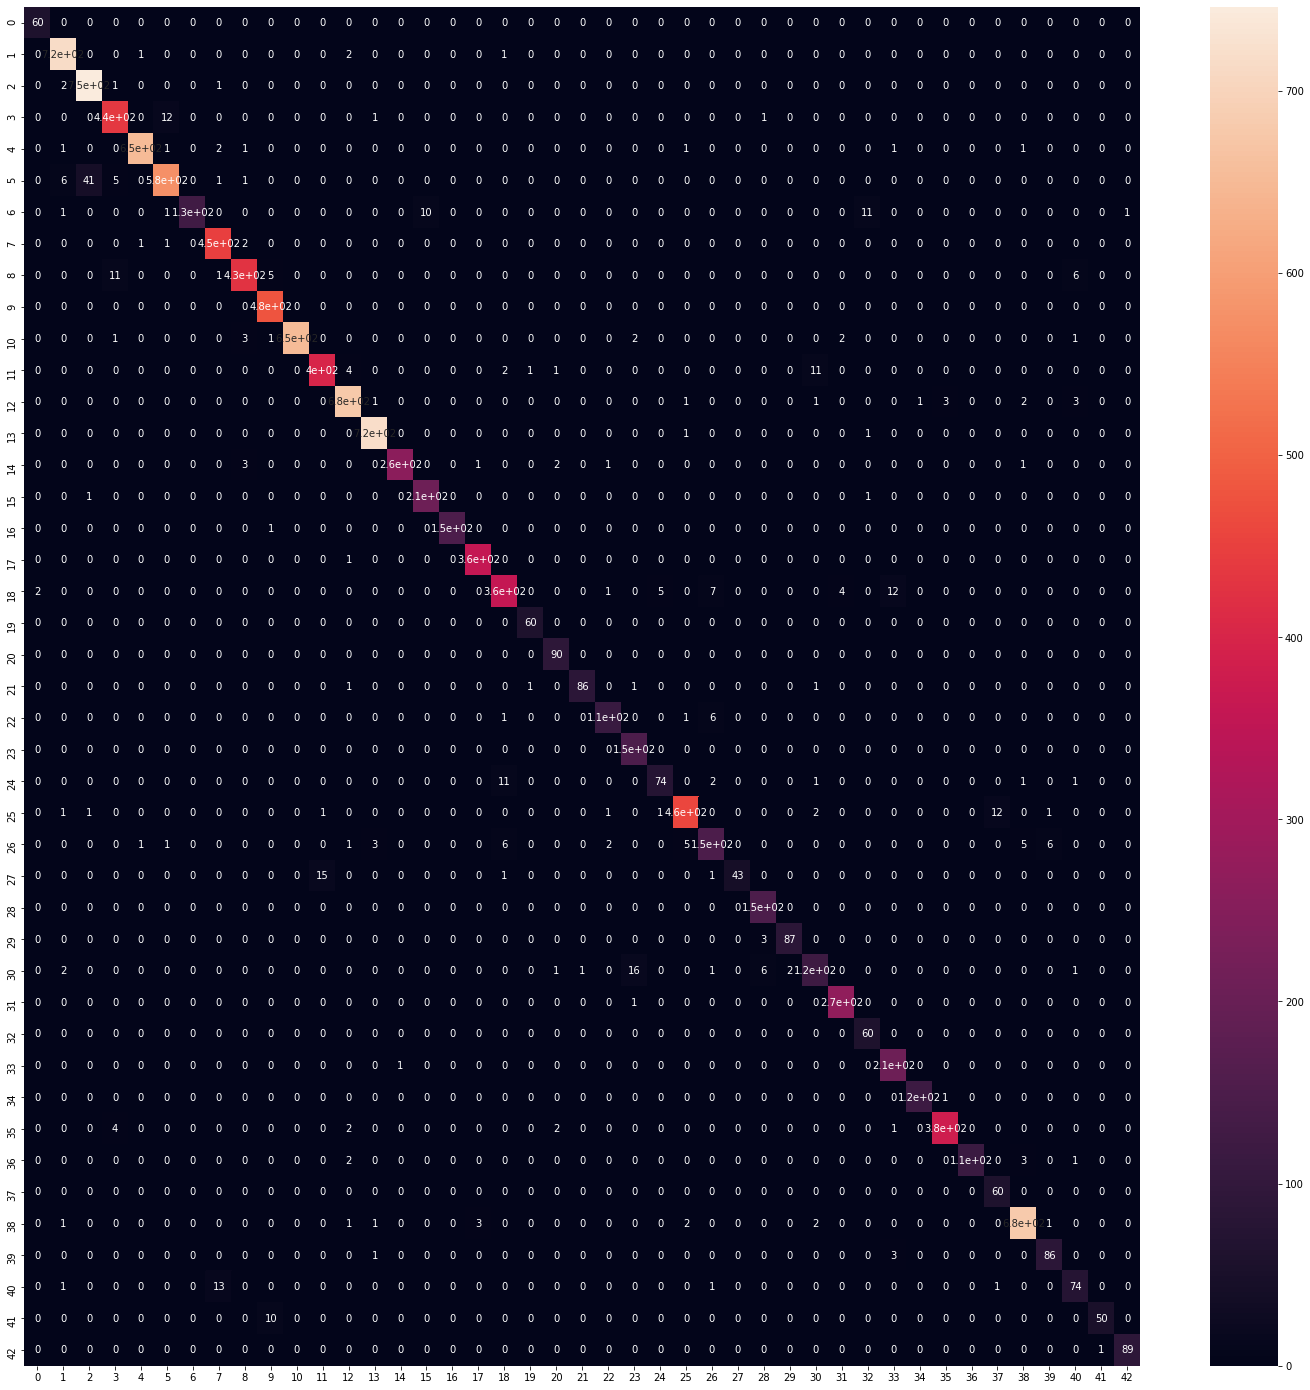

In [38]:
predicted_classes=model.predict_classes(X_test_norm)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True) 

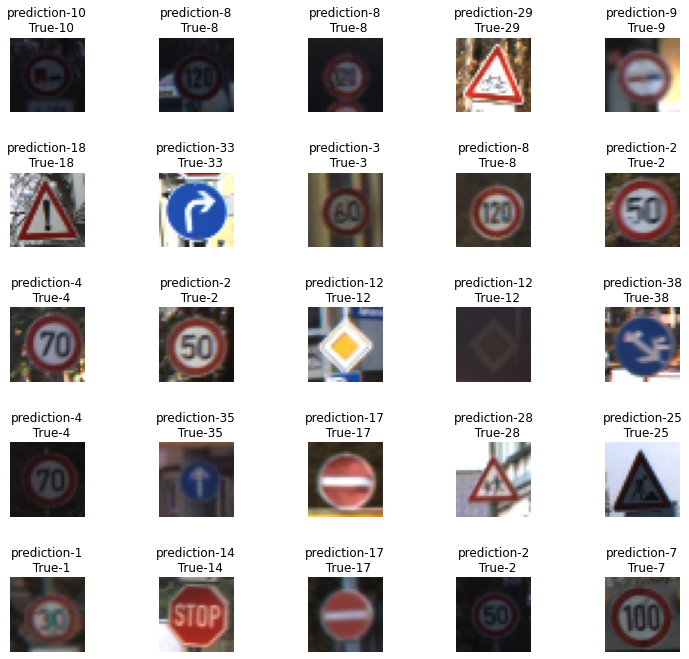

In [39]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction-{}\n  True-{}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [ ]:
model.save('/gdrive/My Drive/Traffic-Sign-Classification/Code')

INFO:tensorflow:Assets written to: /gdrive/My Drive/Traffic-Sign-Classification/Code/assets


In [ ]:
new_model = models.load_model('/gdrive/My Drive/Traffic-Sign-Classification/Code')

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 64)         

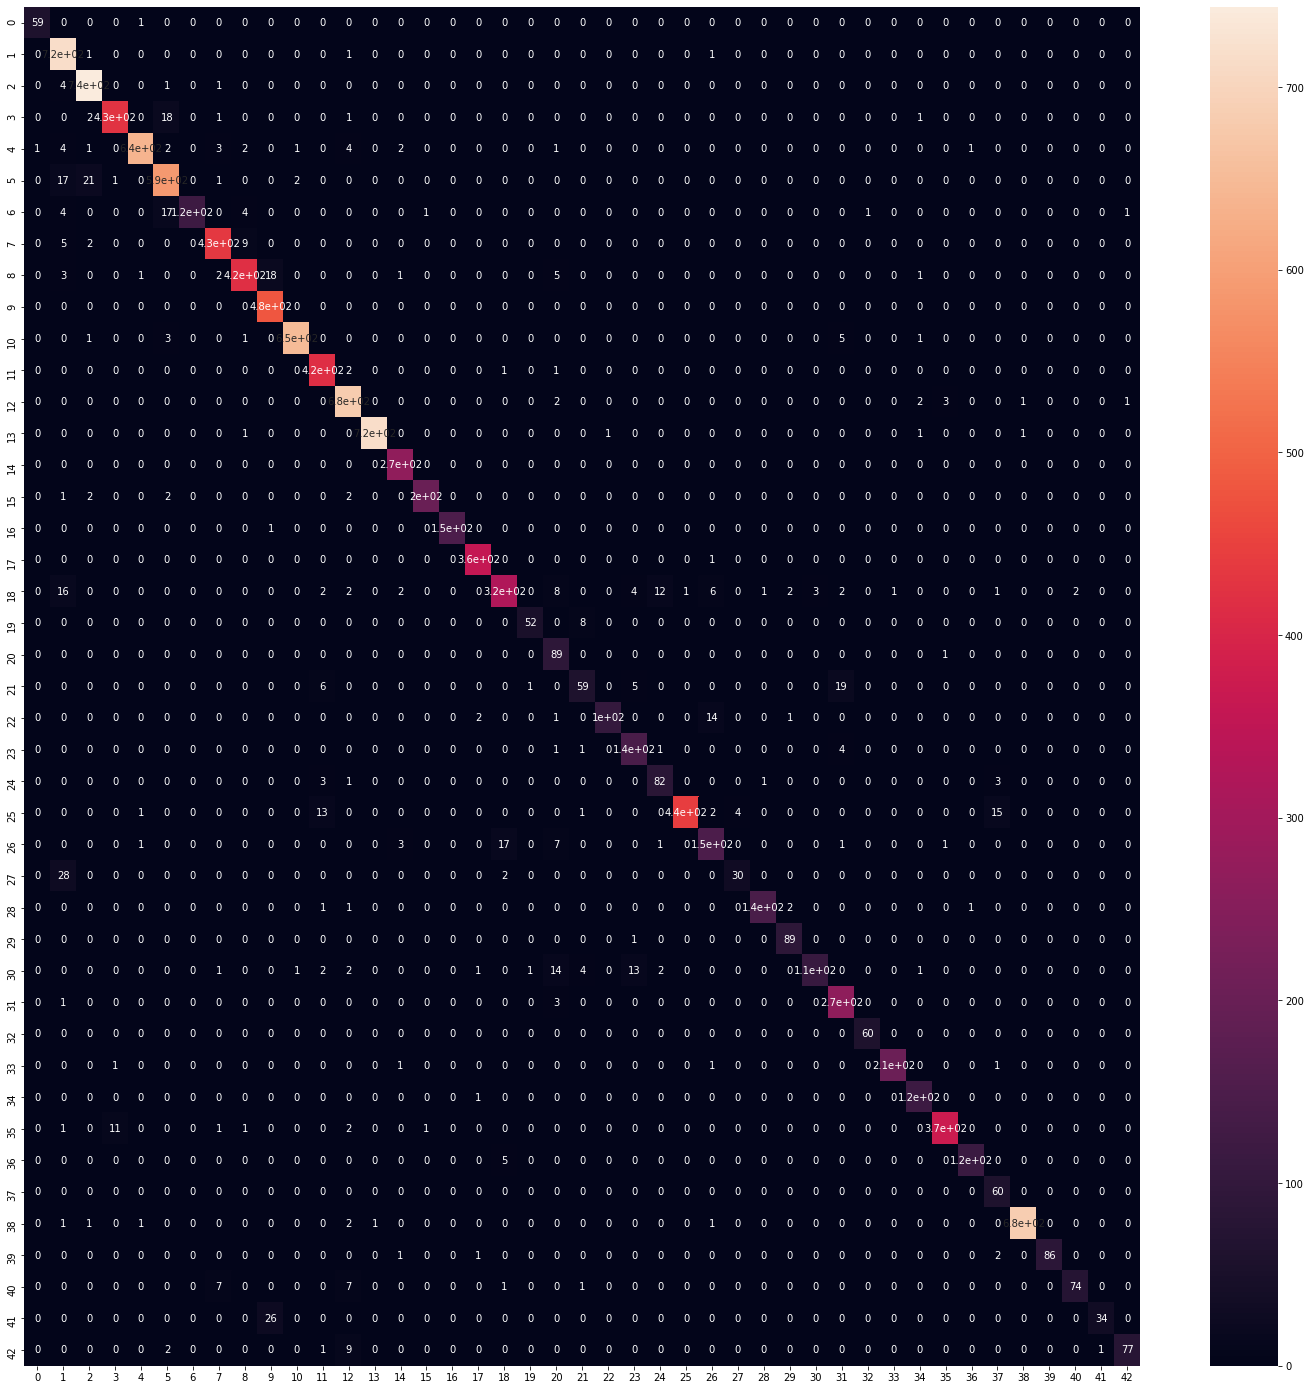

In [ ]:
predicted_classes=new_model.predict_classes(X_test_norm)
y_true=y_test
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True) 